<a href="https://colab.research.google.com/github/chacha86/BigData3/blob/colab/%ED%99%95%EB%A5%A0%EC%A0%81%20%EA%B2%BD%EC%82%AC%20%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(0.957983193277311, 0.925)

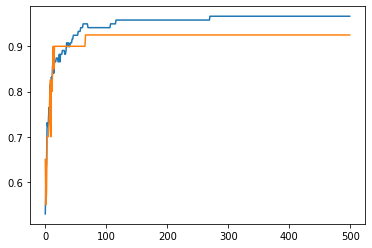

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fish = pd.read_csv('/content/Fish.csv')

fish_input = fish[['Weight', 'Length2','Length3', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

from sklearn.model_selection import train_test_split

trd, tsd, trt, tst = train_test_split(fish_input, fish_target, random_state=42)

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(trd)
trd_s = ss.transform(trd)
tsd_s = ss.transform(tsd)

from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', random_state=42)

trd_score_list = []
tsd_score_list = []

for i in range(500) :
  sc.partial_fit(trd_s, trt, classes=np.unique(trt))
  trd_score_list.append(sc.score(trd_s, trt))
  tsd_score_list.append(sc.score(tsd_s, tst))

plt.plot(trd_score_list)
plt.plot(tsd_score_list)

sc2 = SGDClassifier(loss='log', max_iter=100, tol=None ,random_state=42)

sc2.fit(trd_s, trt)
sc2.score(trd_s, trt), sc.score(tsd_s, tst)
